In [1]:
import matplotlib.pyplot as plt
plt.style.use('thesis')
import numpy as np

In [2]:
def S11(f,f1,f2):
    Kc = 10e6
    Ki1 = 5e6
    Ki2 = 5e6
    g = 10e6
    return 10*np.log10(np.abs(1-(2*Kc)/(4*g**2/(Ki2+2j*(f-f2)) + (Kc+Ki1) + 2j*(f-f1)  )))

f = np.linspace(5.8e9,6.2e9,1001)
f1 = np.linspace(6.1e9,5.9e9,4001)
f2 = np.concatenate((np.linspace(4e9,8e9,1000),np.linspace(4e9,12e9,1000),np.linspace(5.5e9,6.5e9,2001)))
data =np.array(list(map(lambda x:S11(f,*x),zip(f1,f2)))).T
x = np.linspace(0,80,4001)

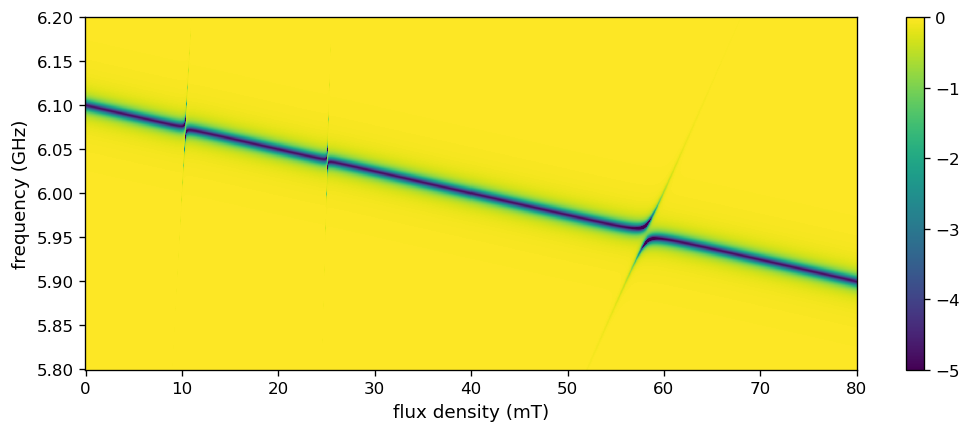

In [3]:
plt.pcolormesh(x,f/1e9,data)
plt.colorbar()
plt.ylabel("frequency (GHz)")
plt.xlabel("flux density (mT)")
plt.clim(-5,0)

There is one prominent anticrossing at around 60mT, but the others are barely visible in the plot. To show these in more detail, insets with zoom-ins would be helpful. In fact, this is really easy to do, so please don't create different plots and stitch them together with inkscape.
 * Create a new axis (i.e. plotting area) with `ax.inset_axes([left,bottom,width,height])`.
   * As default, figure units are used, where `(0,0)` is the left bottom and `(1,1)` the right top.
   * With the option `transform=ax.transData` you can express the location in data coordinates.
 * Plot your data on the new axis
 * Add the connection lines with `ax.indicate_inset_zoom`.
 * That's it

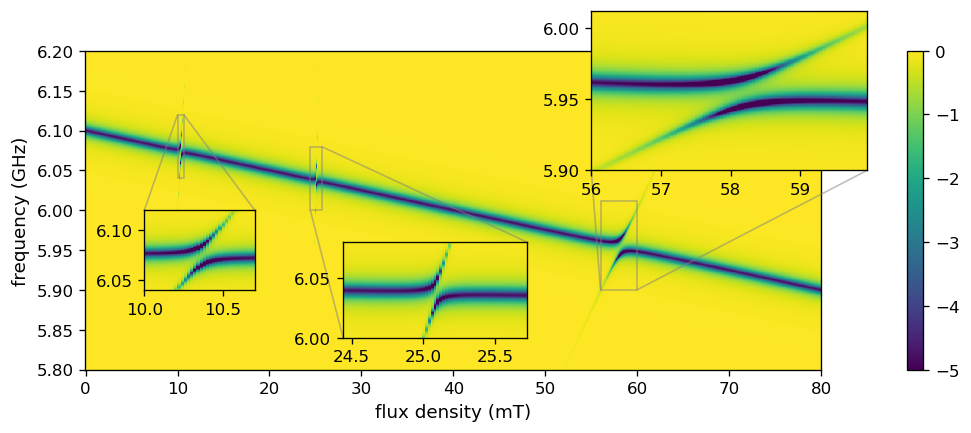

In [4]:
pcm = plt.pcolormesh(x,f/1e9,data)
plt.colorbar()
plt.ylabel("frequency (GHz)")
plt.xlabel("flux density (mT)")
plt.clim(-5,0)

ax = plt.gca() #GetCurrentAxis

inset1 = ax.inset_axes([.08,.25,.15,.25]) # this is in figure coordinates (0...1)
inset1.pcolormesh(x,f/1e9,data,vmin=-5,vmax=0) # we set the colorbar limit explicitly here
inset1.set_xlim(10.,10.7)
inset1.set_ylim(6.04, 6.1196)
ax.indicate_inset_zoom(inset1)


inset2 = ax.inset_axes([28,5.84,20,.12],transform=ax.transData) # or if you prefer data coordinates
inset2.pcolormesh(x,f/1e9,data,vmin=-5,vmax=0)
inset2.set_xlim(24.44, 25.72)
inset2.set_ylim(6.0, 6.0796)
ax.indicate_inset_zoom(inset2)


inset3 = ax.inset_axes([55,6.05,30,.2],transform=ax.transData) # The inset can also leave the initial plotting area
inset3.pcolormesh(x,f/1e9,data,vmin=-5,vmax=0)
inset3.set_xlim(56.0, 59.96)
inset3.set_ylim(5.9, 6.0116)
ax.indicate_inset_zoom(inset3)
plt.show()

There is one **drawback of the above code**: In each inset, the whole data is plotted again, which can consume a lot of memory and will take some time. To avoid this, you can restrict the plotted data by using only slices of the data. Instead of using the square bracket notation `[123:789,111:333]`, it makes sense to use the slice notation `(slice(123,789),slice(111,333)` here, since you can store this in a variable. Note that for colorplots the first index is the y axis and the second the x axis, i.e.  `slc = (slice(yimin,yimax),slice(ximin,ximax))`. 
 * Create a slice of the data you want to show `slc = (slice(600,800),slice(250,270))`
 * Access the data with this slice `data[slc]`
 * Access the x axis: `x[slc[1]]`
 * Access the y axis: `f[slc[0]]`

This reduces the amount of data which has to be plotted, and even in this simple example, speeds up the plot from 12.6s to 3.1s! Please remember this if you have large datasets!

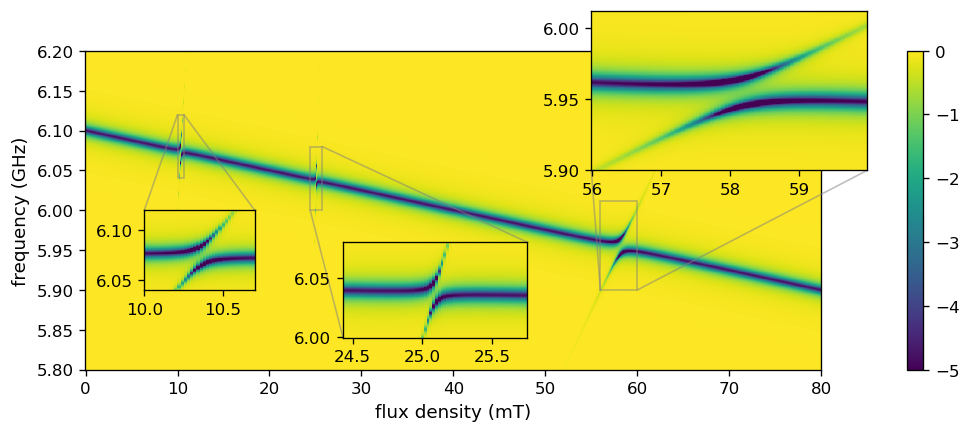

In [5]:
plt.pcolormesh(x,f/1e9,data)
plt.colorbar()
plt.ylabel("frequency (GHz)")
plt.xlabel("flux density (mT)")
plt.clim(-5,0)

ax = plt.gca() #GetCurrentAxis

slc = (slice(600,800),slice(500,540))
inset1 = ax.inset_axes([.08,.25,.15,.25]) # this is again in figure coordinates (0...1)
inset1.pcolormesh(x[slc[1]],f[slc[0]]/1e9,data[slc],vmin=-5,vmax=0)
inset1.set_xlim(10.,10.7)
ax.indicate_inset_zoom(inset1)


slc = (slice(500,700),slice(1222,1288))
inset2 = ax.inset_axes([28,5.84,20,.12],transform=ax.transData) # this is again in figure coordinates (0...1)
inset2.pcolormesh(x[slc[1]],f[slc[0]]/1e9,data[slc],vmin=-5,vmax=0)
ax.indicate_inset_zoom(inset2)


slc = (slice(250,530),slice(2800,3000))
inset3 = ax.inset_axes([55,6.05,30,.2],transform=ax.transData)
inset3.pcolormesh(x[slc[1]],f[slc[0]]/1e9,data[slc],vmin=-5,vmax=0)
ax.indicate_inset_zoom(inset3)
plt.show()

To easily find the indices, simply plot the data without x and y axis:

In [6]:
slc = (slice(None),slice(None)) # Select the whole data

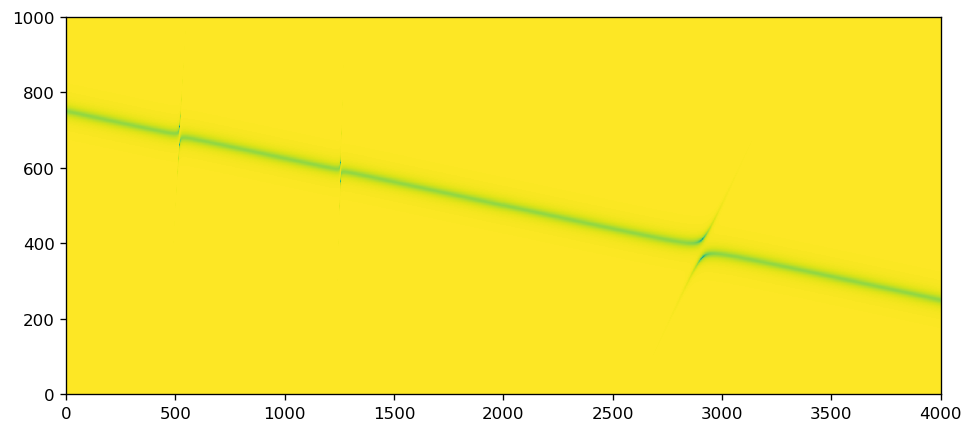

In [7]:
plt.pcolormesh(data[slc])

In [8]:
slc = (slice(200,600),slice(2800,3000)) # Select only a slice, remember that y is first.

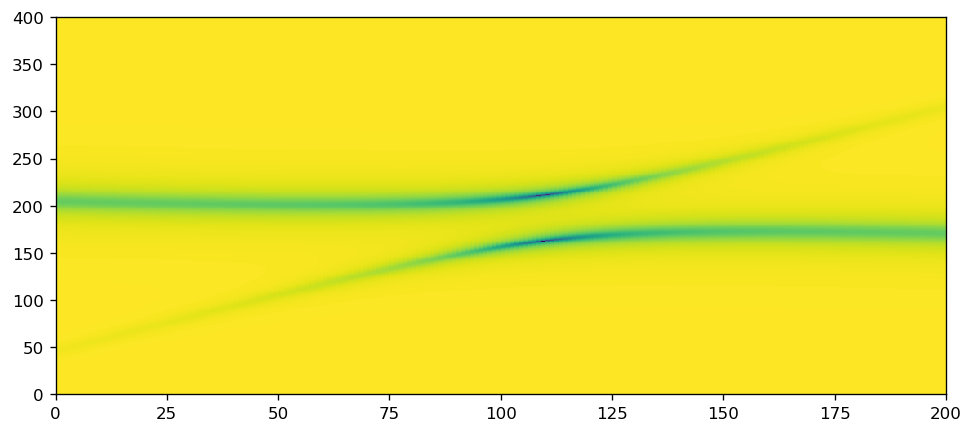

In [9]:
plt.pcolormesh(data[slc])